      Value
0  0.000000
1  2.496714
2  2.361079
3  3.119904
4  4.147011


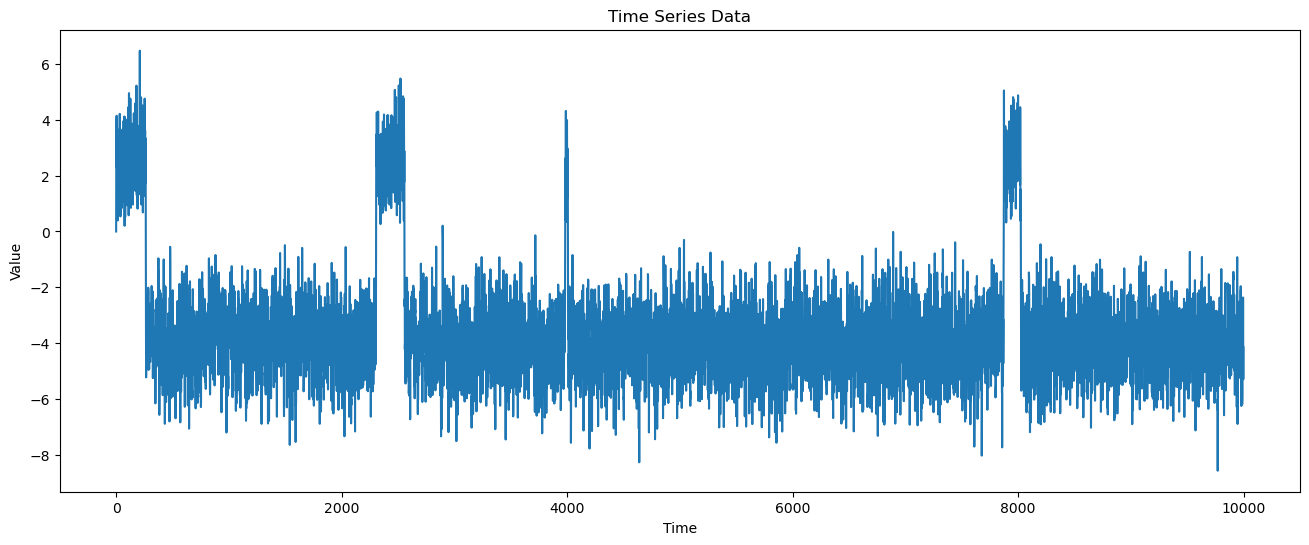

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.optimize import minimize
data = pd.read_csv('data.csv', index_col = 0)
print(data.head())
X_t = np.array(data['Value'])
#print(X_t)
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

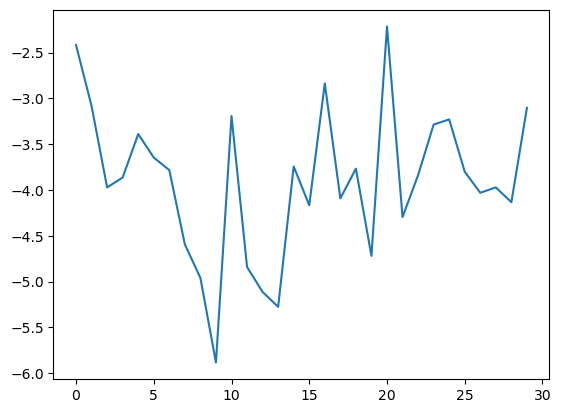

In [173]:
plt.plot(X_t[1200:1230])

In [218]:
import numpy as np
from scipy.optimize import minimize

def conditional_expectation(X_t_lagged, theta, threshold=0):
    return np.where(X_t_lagged < threshold,
                    theta[0] + 0.5*X_t_lagged,
                    theta[1] + 0.2*X_t_lagged) 

def loss_function(X_t, theta, threshold=0):
    X_pred = conditional_expectation(X_t[:-1], theta, threshold)
    #print("X_pred:", np.mean((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2))
    #return np.mean((X_t[1 : ] - conditional_expectation(X_t[ : -1], theta)) ** 2) 
    return np.sum((X_t[1 : ] - X_pred) ** 2, axis=0)

# Estimate parameters
theta_0 = np.zeros(2)
res = minimize(lambda thet: loss_function(X_t, thet, threshold=0),
               theta_0, method='Nelder-Mead')

print("Estimated parameters:", res.x)

Estimated parameters: [-2.00247809  2.00170991]


Estimated parameters for n = 0 : [0. 0.]
Estimated parameters for n = 50 : [-0.90393546  1.80587691]
Estimated parameters for n = 100 : [-0.94867454  1.89747409]
Estimated parameters for n = 150 : [-0.95743871  1.91512743]
Estimated parameters for n = 200 : [-0.98263386  1.96476772]
Estimated parameters for n = 250 : [-0.99778297  1.99594093]
Estimated parameters for n = 300 : [-2.00130624  1.99145676]
Estimated parameters for n = 350 : [-1.9719841   1.99145984]
Estimated parameters for n = 400 : [-1.92621706  1.9914697 ]
Estimated parameters for n = 450 : [-1.94687748  1.99147293]
Estimated parameters for n = 500 : [-1.97011632  1.99149274]
Estimated parameters for n = 550 : [-2.02331187  1.99144928]
Estimated parameters for n = 600 : [-2.01854408  1.99143043]
Estimated parameters for n = 650 : [-2.01280498  1.99146047]
Estimated parameters for n = 700 : [-2.00751408  1.99142689]
Estimated parameters for n = 750 : [-2.0200684   1.99143326]
Estimated parameters for n = 800 : [-2.007630

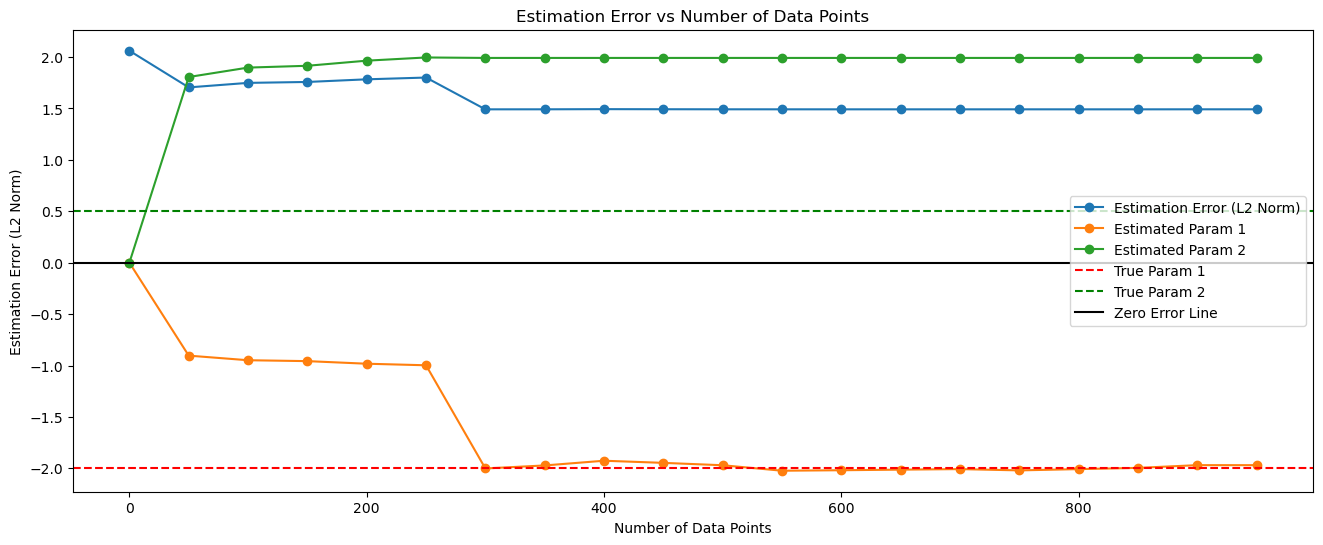

In [219]:
# plot the error between Estimated parameters and true parameters -2 and 0.5 as a function of Number of data points
true_params = np.array([-2, 0.5])
data_points = np.arange(0, 1000, 50)
errors = []
param_1 = []
param_2 = []
for n in data_points:
    X_t_subset = X_t[:n]
    res = minimize(lambda thet: loss_function(X_t_subset, thet, threshold=0),
                   theta_0, method='Nelder-Mead')
    estimated_params = res.x
    print("Estimated parameters for n =", n, ":", estimated_params)
    error = np.linalg.norm(estimated_params - true_params)
    param_1.append(estimated_params[0])
    param_2.append(estimated_params[1])
    errors.append(error)
plt.figure(figsize=(16, 6))
plt.plot(data_points, errors, marker='o', label='Estimation Error (L2 Norm)')

plt.plot(data_points, param_1, marker='o', label='Estimated Param 1')
plt.plot(data_points, param_2, marker='o', label='Estimated Param 2')
plt.axhline(y=true_params[0], color='r', linestyle='--', label='True Param 1')
plt.axhline(y=true_params[1], color='g', linestyle='--', label='True Param 2')
plt.axhline(y=0, color='k', linestyle='-', label='Zero Error Line')
plt.legend()
plt.xlabel('Number of Data Points')
plt.ylabel('Estimation Error (L2 Norm)')
plt.title('Estimation Error vs Number of Data Points')
plt.show()  

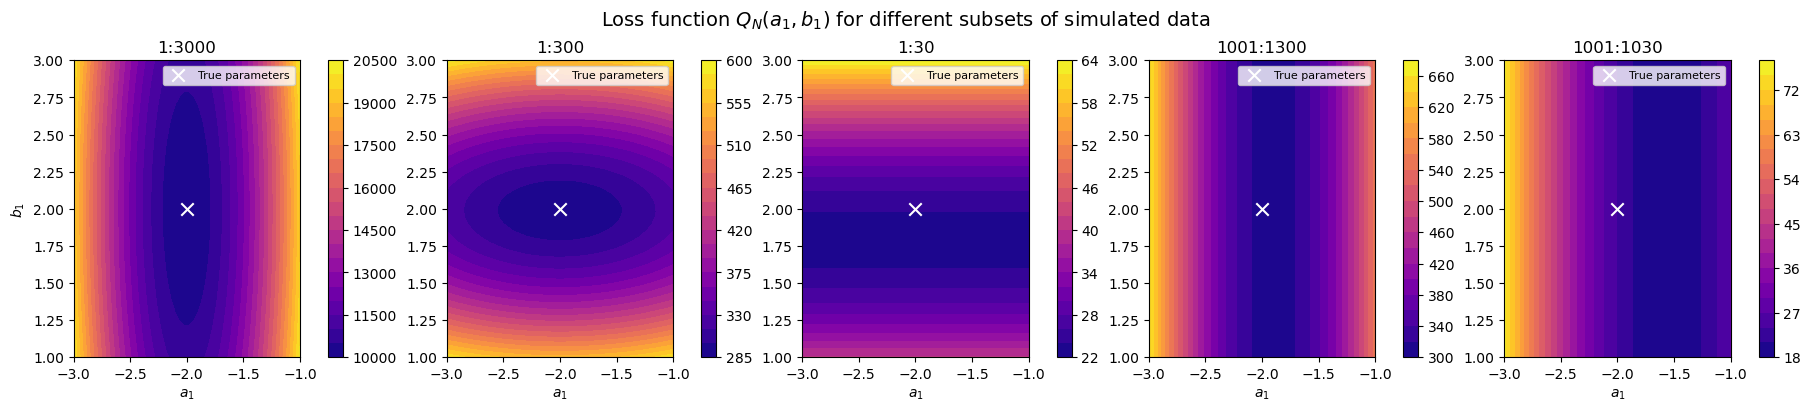

In [224]:
subsets = {
    "1:3000": X_t[1:10000],
    "1:300": X_t[1:300],
     "1:30": X_t[1:30], 
    "1001:1300": X_t[1001:1300],
    "1001:1030": X_t[1001:1030],
}

# --- Define parameter grid ---
a1_vals = np.linspace(-3, -1, 50)
b1_vals = np.linspace(1, 3, 50)
A1, B1 = np.meshgrid(a1_vals, b1_vals)

# --- Plot contour maps for all subsets ---
fig, axes = plt.subplots(1, len(subsets), figsize=(18, 4), constrained_layout=True)
for i, (label, data_subset) in enumerate(subsets.items()):
    Z = np.zeros_like(A1)
    for r in range(A1.shape[0]):
        for c in range(A1.shape[1]):
            theta = np.array([A1[r, c], B1[r, c]])
            Z[r, c] = loss_function(data_subset, theta)
    cs = axes[i].contourf(A1, B1, Z, levels=20, cmap='plasma')
    axes[i].scatter(-2.0, 2, color='white', marker='x', s=80, label='True parameters')
    axes[i].set_title(label)
    axes[i].set_xlabel(r'$a_1$')
    if i == 0:
        axes[i].set_ylabel(r'$b_1$')
    axes[i].legend(loc='upper right', fontsize=8)
    fig.colorbar(cs, ax=axes[i])

plt.suptitle(r'Loss function $Q_N(a_1,b_1)$ for different subsets of simulated data', fontsize=14)
plt.show()

In [162]:
# It starts in the other equilibrium so the params dont have an effect (1:30)

loss_function(X_t[:30], np.array([-2, 0.5]))

24.467227900486876

In [163]:
loss_function(X_t[:30], np.array([-2000, 0.9]))

24.467227900486876

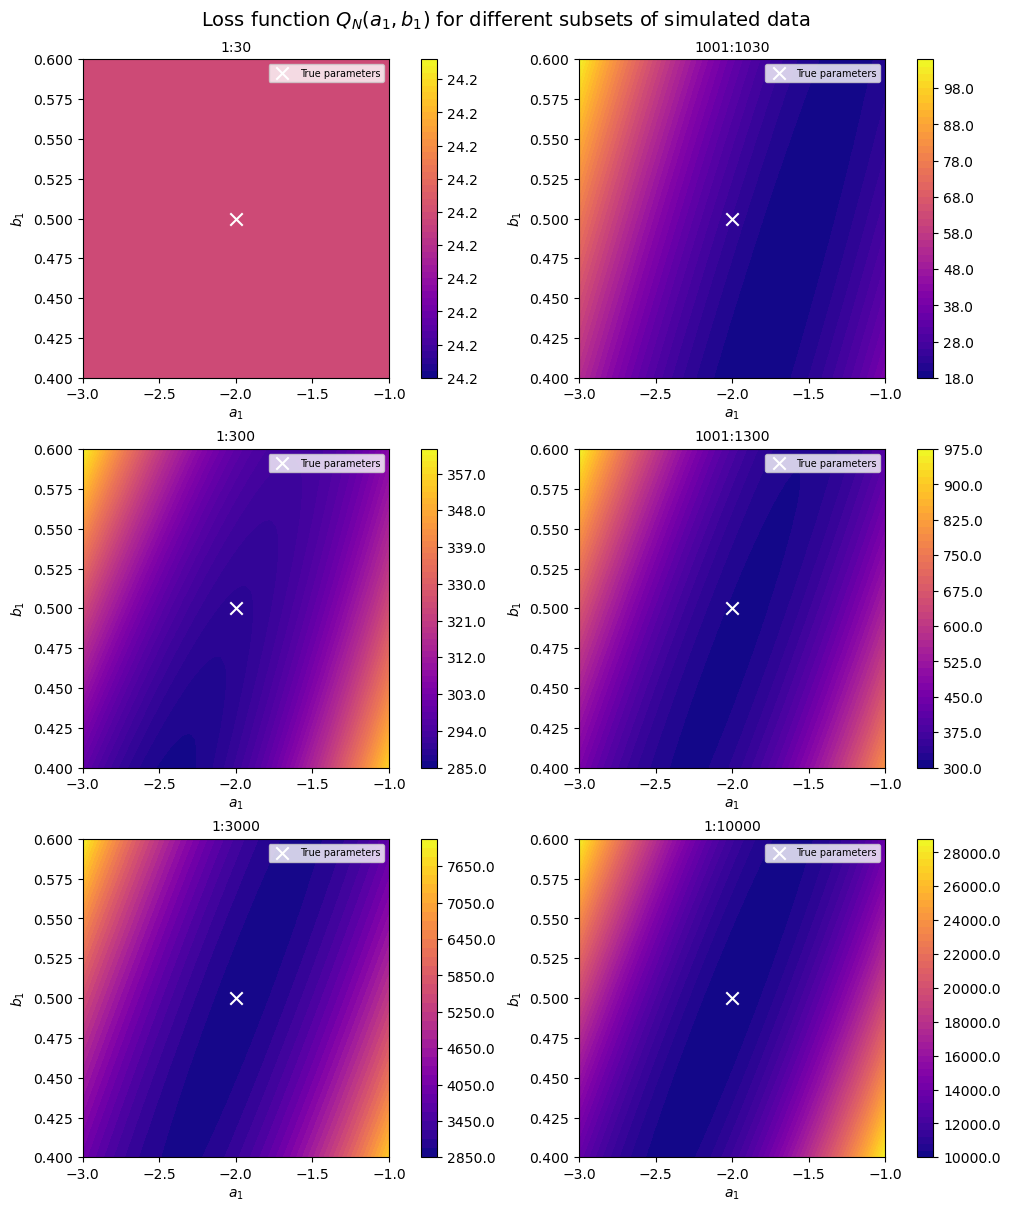

In [212]:
subsets = {
    "1:30": X_t[1:30],
    "1001:1030": X_t[1001:1030],
    "1:300": X_t[1:300],
    "1001:1300": X_t[1001:1300],
    "1:3000": X_t[1:3000],
    "1:10000": X_t[1:10000],
}

a1_vals = np.linspace(-3, -1, 50)
b1_vals = np.linspace(0.4, 0.6, 50)
A1, B1 = np.meshgrid(a1_vals, b1_vals)

fig, axes = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True)
axes = axes.flatten()

for i, (label, data_subset) in enumerate(subsets.items()):
    Z = np.zeros_like(A1)
    for r in range(A1.shape[0]):
        for c in range(A1.shape[1]):
            theta = np.array([A1[r, c], B1[r, c]])
            Z[r, c] = loss_function(data_subset, theta)
    
    cs = axes[i].contourf(A1, B1, Z, levels=50, cmap='plasma')
    axes[i].scatter(-2.0, 0.5, color='white', marker='x', s=80, label='True parameters')
    axes[i].set_title(f"{label}", fontsize=10)
    axes[i].set_xlabel(r'$a_1$')
    axes[i].set_ylabel(r'$b_1$')
    axes[i].legend(loc='upper right', fontsize=7)
    #fig.colorbar(cs, ax=axes[i])
    cb = fig.colorbar(cs, ax=axes[i])
    cb.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))

# Hide unused subplot if fewer than 6 are filled
if len(subsets) < len(axes):
    for j in range(len(subsets), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle(r'Loss function $Q_N(a_1,b_1)$ for different subsets of simulated data', fontsize=14)
plt.show()